# Least-Squares Regression Project
## Statistics, Fall 2021
### Name: Michael Hlavaty

#### __TO-DO__: Ask Mr. Lisa/Peer Reviewer about...
1. Introduction
2. Questions
3. Calculate stderr
4. Include other vars?

There are many factors that go into the valuation of a house. This dataset for House Prices was created in Ames, Iowa in 2011 by a professor in Statistics named Dean De Cock. According to the data science commuity, this is a reputable dataset, and it has been described as a ‘modernized’ version of the controversial Boston Housing dataset, which I analyzed in my Computer Science 630 class this year. The dataset involves more than 70 explanatory variables, and most of them are categorical data which limits my choice of variables for creating a least-squares regression line (LSRL). In this project, I explore the relationship between Lot Area and Sale Price from the dataset for House Prices in Ames, Iowa and attempt to relate the two factors using a LSRL.

In [34]:
# Importing a number of helpful Python libraries for calculating and interpreting data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import math

In [35]:
# Importing the data
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv') 
data.head() # View a sample of the data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Okay, this shows us all of the variables included in the dataset. For this project, we are only focusing on the `LotArea` and `Sale Price`

* `LotArea` is the lot area of the house in square feet
* `SalePrice` is the actual sale price of the house in US dollars

I want to find out if a linear model is appropriate for comparing `LotArea` and `SalePrice`. If so, how well does a LSRL fit these data?

To do this, I will first plot the data in a scatterplot and residual plot. If the linear model appears to be appropriate, I will use the r and r^2 values to analyze how well the LSRL fits the dataset.

### LotArea and SalePrice

In [36]:
# Creating a table containing LotArea and SalePrice
LotArea_x_SalePrice = data[['LotArea', 'SalePrice']]
LotArea_x_SalePrice

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [37]:
# Looking for any missing data
LotArea_x_SalePrice[LotArea_x_SalePrice.isnull().any(axis=1)]

,LotArea,SalePrice


Great! There appears to be no missing data for these two variables. Let's start comparing analyzing these two variables.

#### Graphs for Lot Area and Sale Price

Slope: 2.0999719517076754
Intercept: 158836.15189687657
R value: 0.26384335387140573
R^2: 0.06961331538211182

LSRL: y_hat = 158836.15189687657+2.0999719517076754x



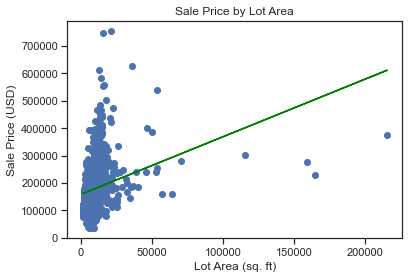

In [38]:
# Creating a scatterplot
lot_areas = np.array([i for i in data.LotArea])
sale_prices = np.array([i for i in data.SalePrice])
plt.scatter(lot_areas, sale_prices)
plt.title("Sale Price by Lot Area")
plt.xlabel("Lot Area (sq. ft)")
plt.ylabel("Sale Price (USD)")

(slope, intercept, rvalue) = linregress(lot_areas,sale_prices)[:3]
y_pred = intercept + slope*lot_areas
plt.plot(lot_areas,y_pred, color="green", label="Fitted line")

print("Slope: {}\nIntercept: {}\nR value: {}\nR^2: {}\n".format(slope, intercept, rvalue, rvalue**2))
print("LSRL: y_hat = {}+{}x\n".format(intercept, slope))

plt.show()

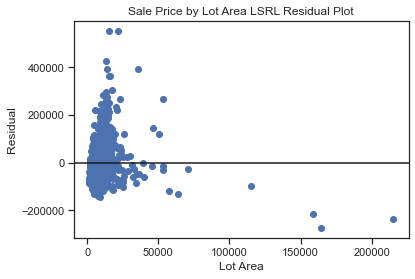

In [44]:
# Creating a residual plot
def get_y_hat(x_set):
    y_hats = []
    for x in x_set:
        y_hat = slope*x + intercept
        y_hats.append(y_hat)
    return y_hats

y_hats = get_y_hat(lot_areas)
residuals = sale_prices - y_hats
import seaborn
seaborn.set(style='ticks')
plt.plot(lot_areas, residuals,'o')
plt.axhline(y=0, color='k')
plt.ylabel("Residual")
plt.xlabel("Lot Area")
plt.title("Sale Price by Lot Area LSRL Residual Plot")
plt.show()

#### Analysis of Graphs for Lot Area and Sale Price

There appears to be a weak, positive, linear association between the `LotArea` of a house and its `SalePrice`. In the scatterplot, there appear to be many outliers in both the x-axis and y-axis. For example, there is an observation around `SalePrice` = $700,000 that appears to deviate a lot from the the rest of houses' `SalePrice` with similar `LotArea` values. There is a lot of `SalePrice` variability for houses with `LotAreas` less than 50,000 sq.ft. In the residual plot, there does not appear to be any obvious overall patterns. Therefore, a linear model is appropriate.

From the computer output, the estimated `SalePrice` based on the `LotArea` is modeled with the LSRL of y_hat = 158836.15189687657+2.0999719517076754x. This means that the `SalePrice` of a house increased approximately $2.10 for every increase of one sq. ft. of `LotArea`. The r-value = 0.26384335387140573, meaning that the data is only weakly correlated. The standard deviation of the residuals is s=XYZ, meaning that the LSRL's predicted values will typically be off by XYZ when using a linear model to relate `LotArea` and `SalePrice`. Finally, only 0.06961331538211182 or around 6.96% of the `SalePrice` variation is accounted by the LSRL relating `LotArea` and `SalePrice`.

A linear model may seem appropriate for comparing `LotArea` to `SalePrice`, but the predictions from the LSRL will likely be inaccurate. The typical prediction error is XYZ, and more than 90% of the variation in the dataset is unaccounted for by the LSRL.